In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/final_data.csv

In [31]:
df = pd.read_csv("/kaggle/input/dataset/Final_data.csv")
df.head()

,label_dis,abdominal cramp,abdominal distention,abnormal behavior,abnormal bleeding,abnormal sensation,abnormally frequent,abscess,aching,acne,...,wet,wheezing,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin,yellowish skin crust
0,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# all necessary imports
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

In [33]:

# creation of features and label for training the models
X = df.iloc[:, 1:]
Y = df.iloc[:, 0:1]

"""*Train Test Split*"""

# splitting data for training the classifiers and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []

#MNB

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from decimal import Decimal

# Handle missing values in x_train by imputing them with the mean of each column
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Handle missing values in y_train (if any)
y_train_imputed = y_train.fillna(method='ffill')  # Forward fill missing values if present

# Multinomial NB Classifier
mnb = MultinomialNB()
mnb.fit(x_train_imputed, y_train_imputed)  # Fit on the training data after handling missing values

# Prediction of labels for the test data
mnb_pred_test = mnb.predict(x_test)

# Calculation of accuracy score based on predictions performed on the test data
acc_mnb_test = round(Decimal(accuracy_score(y_test, mnb_pred_test) * 100), 2)
accuracy_list.append(acc_mnb_test)
model_list.append("MNB")
print(f"Accuracy (MNB Test) : {acc_mnb_test}%")

# Cross Validation Accuracy MNB
# performing cross validation with 5 different splits
scores_mnb = cross_val_score(mnb, x_train_imputed, y_train_imputed, cv=5, scoring='accuracy')
# mean of cross val score (accuracy)
score = round(Decimal(scores_mnb.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MNB): {score}%")

def predict_disease(symptoms):
    # Load the trained Multinomial Naive Bayes classifier
    mnb = MultinomialNB()
    mnb.fit(x_train_imputed, y_train_imputed)  # Fit on the training data after handling missing values

    # Create a DataFrame with zeros for all columns
    user_input = pd.DataFrame(0, index=range(len(symptoms)), columns=X.columns)

    # Set the value to 1 for the columns corresponding to the user input symptoms
    for symptom in symptoms:
        if symptom in user_input.columns:
            user_input[symptom] = 1

    # Predict the possible diseases based on the user input
    possible_diseases = mnb.predict(user_input)

    # Return the predicted possible diseases
    return possible_diseases


# Take input from the user for symptoms
user_symptoms = input("Enter the symptoms separated by commas: ").split(',')

# Predict possible diseases based on the user input
predicted_diseases = predict_disease(user_symptoms)

print("Possible diseases based on symptoms:")
for disease in predicted_diseases:
    print("- ", disease)


Accuracy (MNB Test) : 85.75%
Cross Validation Accuracy (MNB): 81.93%


Enter the symptoms separated by commas:  acne,acrocyanosis


Possible diseases based on symptoms:
-  Polycystic ovary syndrome (PCOS)
-  Polycystic ovary syndrome (PCOS)


In [35]:
print(model_list)
print(accuracy_list)
print(cross_accuracy_list)

['MNB']
[Decimal('85.75')]
[Decimal('81.93')]


#KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in both training and test data
X_imputed = imputer.fit_transform(X)
x_test_imputed = imputer.transform(x_test)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
knn.fit(X_imputed, Y)

# Prediction of labels for the test data
knn_pred = knn.predict(x_test_imputed)
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)
accuracy_list.append(acc_knn)
model_list.append("KNN")
# Print accuracy
print(f"Accuracy (KNN): {acc_knn}%")

# Cross Validation Accuracy KNN
# performing cross validation with 5 different splits
scores_knn = cross_val_score(knn, X_imputed, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_knn.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (KNN): {score}%")

def predict_disease_knn(symptoms):
    # Load the trained KNN classifier
    knn = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
    knn.fit(X_imputed, Y)

    # Create a DataFrame with zeros for all columns
    user_input = pd.DataFrame(0, index=range(len(symptoms)), columns=X.columns)

    # Set the value to 1 for the columns corresponding to the user input symptoms
    for symptom in symptoms:
        if symptom in user_input.columns:
            user_input[symptom] = 1

    # Predict the possible diseases based on the user input
    possible_diseases = knn.predict(user_input)

    # Return the predicted possible diseases
    return possible_diseases


# Take input from the user for symptoms
user_symptoms = input("Enter the symptoms separated by commas: ").split(',')

# Predict possible diseases based on the user input using KNN
predicted_diseases_knn = predict_disease_knn(user_symptoms)

print("Possible diseases based on symptoms (KNN):")
for disease in predicted_diseases_knn:
    print("- ", disease)


Accuracy (KNN): 92.42%
Cross Validation Accuracy (KNN): 84.40%


Enter the symptoms separated by commas:  acne,acrocyanosis


Possible diseases based on symptoms (KNN):
-  Polycystic ovary syndrome (PCOS)
-  Polycystic ovary syndrome (PCOS)


In [37]:
print(model_list)
print(accuracy_list)
print(cross_accuracy_list)

['MNB', 'KNN']
[Decimal('85.75'), Decimal('92.42')]
[Decimal('81.93'), Decimal('84.40')]


#LINEAR REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in both training and test data
X_imputed = imputer.fit_transform(X)
x_test_imputed = imputer.transform(x_test)

# LR Classifier
lr = LogisticRegression()
lr.fit(X_imputed, Y)

# Prediction of labels for the test data
lr_pred = lr.predict(x_test_imputed)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)
accuracy_list.append(acc_lr)
model_list.append("LR")
# Print accuracy
print(f"Accuracy (LR) : {acc_lr}%")

# Cross Validation Accuracy LR
# performing cross validation with 5 different splits
scores_lr = cross_val_score(lr, X_imputed, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_lr.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (LR): {score}%")

def predict_disease_lr(symptoms):
    # Load the trained LR classifier
    lr = LogisticRegression()
    lr.fit(X_imputed, Y)

    # Create a DataFrame with zeros for all columns
    user_input = pd.DataFrame(0, index=range(len(symptoms)), columns=X.columns)

    # Set the value to 1 for the columns corresponding to the user input symptoms
    for symptom in symptoms:
        if symptom in user_input.columns:
            user_input[symptom] = 1

    # Predict the possible diseases based on the user input
    possible_diseases = lr.predict(user_input)

    # Return the predicted possible diseases
    return possible_diseases


# Take input from the user for symptoms
user_symptoms = input("Enter the symptoms separated by commas: ").split(',')

# Predict possible diseases based on the user input using LR
predicted_diseases_lr = predict_disease_lr(user_symptoms)

print("Possible diseases based on symptoms (LR):")
for disease in predicted_diseases_lr:
    print("- ", disease)


Accuracy (LR) : 92.99%
Cross Validation Accuracy (LR): 89.19%


Enter the symptoms separated by commas:  acne,acrocyanosis


Possible diseases based on symptoms (LR):
-  Polycystic ovary syndrome (PCOS)
-  Polycystic ovary syndrome (PCOS)


In [39]:
print(model_list)
print(accuracy_list)
print(cross_accuracy_list)

['MNB', 'KNN', 'LR']
[Decimal('85.75'), Decimal('92.42'), Decimal('92.99')]
[Decimal('81.93'), Decimal('84.40'), Decimal('89.19')]


#SVM

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in both training and test data
X_imputed = imputer.fit_transform(X)
x_test_imputed = imputer.transform(x_test)

# SVM Classifier
svm = SVC()
svm.fit(X_imputed, Y)

# Prediction of labels for the test data
svm_pred = svm.predict(x_test_imputed)
acc_svm = round(Decimal(accuracy_score(y_test, svm_pred) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
# Print accuracy
print(f"Accuracy (SVM) : {acc_svm}%")

# Cross Validation Accuracy SVM
# performing cross validation with 5 different splits
scores_svm = cross_val_score(svm, X_imputed, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

def predict_disease_svm(symptoms):
    # Load the trained SVM classifier
    svm = SVC()
    svm.fit(X_imputed, Y)

    # Create a DataFrame with zeros for all columns
    user_input = pd.DataFrame(0, index=range(len(symptoms)), columns=X.columns)

    # Set the value to 1 for the columns corresponding to the user input symptoms
    for symptom in symptoms:
        if symptom in user_input.columns:
            user_input[symptom] = 1

    # Predict the possible diseases based on the user input
    possible_diseases = svm.predict(user_input)

    # Return the predicted possible diseases
    return possible_diseases


# Take input from the user for symptoms
user_symptoms = input("Enter the symptoms separated by commas: ").split(',')

# Predict possible diseases based on the user input using SVM
predicted_diseases_svm = predict_disease_svm(user_symptoms)

print("Possible diseases based on symptoms (SVM):")
for disease in predicted_diseases_svm:
    print("- ", disease)


Accuracy (SVM) : 92.53%
Cross Validation Accuracy (SVM): 88.62%


Enter the symptoms separated by commas:  acne,acrocyanosis


Possible diseases based on symptoms (SVM):
-  Polycystic ovary syndrome (PCOS)
-  Polycystic ovary syndrome (PCOS)


#DT

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in both training and test data
X_imputed = imputer.fit_transform(X)
x_test_imputed = imputer.transform(x_test)

# DT Classifier
dt = DecisionTreeClassifier()
dt.fit(X_imputed, Y)

# Prediction of labels for the test data
dt_pred = dt.predict(x_test_imputed)
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")

# Print accuracy
print(f"Accuracy (DT) : {acc_dt}%")

# Cross Validation Accuracy DT
# performing cross validation with 5 different splits
scores_dt = cross_val_score(dt, X_imputed, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

def predict_disease_dt(symptoms):
    # Load the trained DT classifier
    dt = DecisionTreeClassifier()
    dt.fit(X_imputed, Y)

    # Create a DataFrame with zeros for all columns
    user_input = pd.DataFrame(0, index=range(len(symptoms)), columns=X.columns)

    # Set the value to 1 for the columns corresponding to the user input symptoms
    for symptom in symptoms:
        if symptom in user_input.columns:
            user_input[symptom] = 1

    # Predict the possible diseases based on the user input
    possible_diseases = dt.predict(user_input)

    # Return the predicted possible diseases
    return possible_diseases


# Take input from the user for symptoms
user_symptoms = input("Enter the symptoms separated by commas: ").split(',')

# Predict possible diseases based on the user input using DT
predicted_diseases_dt = predict_disease_dt(user_symptoms)

print("Possible diseases based on symptoms (DT):")
for disease in predicted_diseases_dt:
    print("- ", disease)


Accuracy (DT) : 92.42%
Cross Validation Accuracy (DT): 83.55%


Enter the symptoms separated by commas:  acne,acrocyanosis


Possible diseases based on symptoms (DT):
-  Polycystic ovary syndrome (PCOS)
-  Polycystic ovary syndrome (PCOS)


In [42]:
print(model_list)
print(accuracy_list)
print(cross_accuracy_list)

['MNB', 'KNN', 'LR', 'SVM', 'DT']
[Decimal('85.75'), Decimal('92.42'), Decimal('92.99'), Decimal('92.53'), Decimal('92.42')]
[Decimal('81.93'), Decimal('84.40'), Decimal('89.19'), Decimal('88.62'), Decimal('83.55')]


#MLP

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Instantiate the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in both training and test data
X_imputed = imputer.fit_transform(X)
x_test_imputed = imputer.transform(x_test)

# MLP Classifier
mlp = MLPClassifier()
mlp.fit(X_imputed, Y)

# Prediction of labels for the test data
mlp_pred = mlp.predict(x_test_imputed)
acc_mlp = round(Decimal(accuracy_score(y_test, mlp_pred) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
# Print accuracy
print(f"Accuracy (MLP) : {acc_mlp}%")

# Cross Validation Accuracy MLP
# performing cross validation with 5 different splits
scores_mlp = cross_val_score(mlp, X_imputed, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

def predict_disease_mlp(symptoms):
    # Load the trained MLP classifier
    mlp = MLPClassifier()
    mlp.fit(X_imputed, Y)

    # Create a DataFrame with zeros for all columns
    user_input = pd.DataFrame(0, index=range(len(symptoms)), columns=X.columns)

    # Set the value to 1 for the columns corresponding to the user input symptoms
    for symptom in symptoms:
        if symptom in user_input.columns:
            user_input[symptom] = 1

    # Predict the possible diseases based on the user input
    possible_diseases = mlp.predict(user_input)

    # Return the predicted possible diseases
    return possible_diseases


# Take input from the user for symptoms
user_symptoms = input("Enter the symptoms separated by commas: ").split(',')

# Predict possible diseases based on the user input using MLP
predicted_diseases_mlp = predict_disease_mlp(user_symptoms)

print("Possible diseases based on symptoms (MLP):")
for disease in predicted_diseases_mlp:
    print("- ", disease)


Accuracy (MLP) : 92.42%
Cross Validation Accuracy (MLP): 88.89%


Enter the symptoms separated by commas:  acne,acrocyanosis


Possible diseases based on symptoms (MLP):
-  Premenstrual syndrome
-  Premenstrual syndrome


In [44]:
print(model_list)
print(accuracy_list)
print(cross_accuracy_list)

['MNB', 'KNN', 'LR', 'SVM', 'DT', 'MLP']
[Decimal('85.75'), Decimal('92.42'), Decimal('92.99'), Decimal('92.53'), Decimal('92.42'), Decimal('92.42')]
[Decimal('81.93'), Decimal('84.40'), Decimal('89.19'), Decimal('88.62'), Decimal('83.55'), Decimal('88.89')]


In [45]:
import pickle



# Save lists to a file using pickle
with open('lists_data.pkl', 'wb') as f:
    pickle.dump((model_list, accuracy_list), f)


In [47]:
import pickle

# Load lists from the file using pickle
with open('lists_data.pkl', 'rb') as f:
    model_list, accuracy_list = pickle.load(f)

# Now you can use model_list and accuracy_list
print("Model List:", model_list)
print("Accuracy List:", accuracy_list)


Model List: ['MNB', 'KNN', 'LR', 'SVM', 'DT', 'MLP']
Accuracy List: [Decimal('85.75'), Decimal('92.42'), Decimal('92.99'), Decimal('92.53'), Decimal('92.42'), Decimal('92.42')]


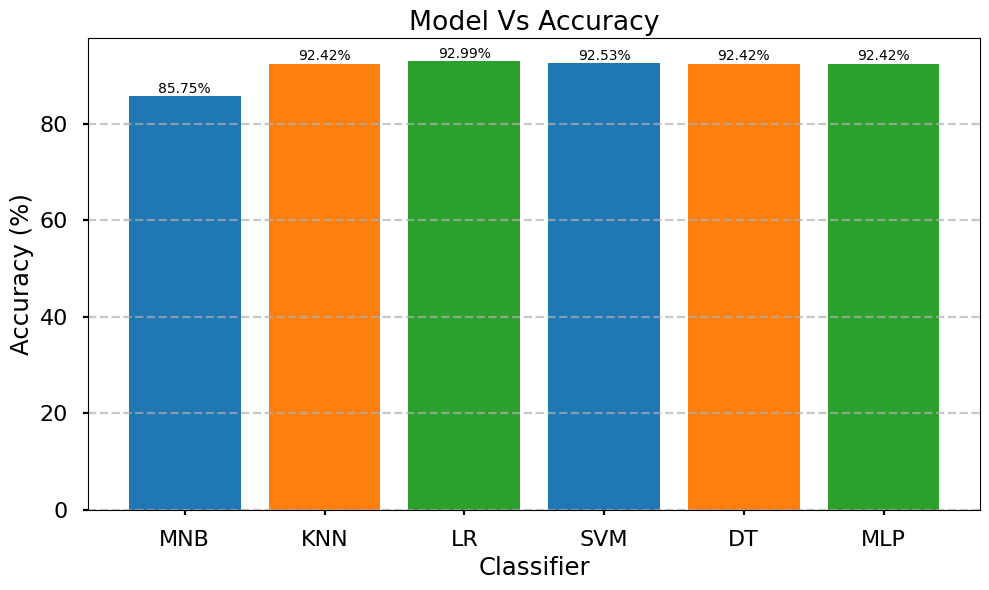

In [49]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(model_list, accuracy_list, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels and title
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')

# Add data labels on top of the bars
for bar, accuracy in zip(bars, accuracy_list):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{accuracy:.2f}%', 
             ha='center', va='bottom', color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
